# KNN (K-Nearest Neighbour)

## What?
KNN is simple <b>Supervised Learning</b>, which will see K most similiar data based on its <b>distance</b>.

KNN can be used for:
- Classification
- Regression

## Is It Good?
Pros:
- Simple
- No need to train model

Cons:
- Memory
- Time

## How?
Steps:
1. Get labeled data
2. Calculate distance from input data to each labeled data
3. Choose K Nearest Neighbour
4. Search for most frequent class (Classification) / calculate average output (Regression)

## Simple Case
Classification: Deterimine learning grade (Either A, B, or C) for student

#### Read Dataset (CSV)

In [1]:
#Using Pandas (Python Data Analysis Library)
import pandas as pd

def read_dataset(filename):
    dataset = pd.read_csv(filename)
    return dataset

#### Distance (Euclidean Distance)

In [2]:
from math import sqrt
def dist(a, b):
    return sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

#### Mode (Most frequent data)

In [3]:
def mode(dataset):
    most_frequent_data = dataset[0]
    curr_data = dataset[0]
    counter = 0
    max_counter = 0
    for data in dataset:
        if curr_data == data:
            counter += 1
        else:
            curr_data = data
            counter = 1

        if counter > max_counter:
            most_frequent_data = curr_data
            max_counter = counter
    return most_frequent_data

#### Plotting Data

In [14]:
import matplotlib.pyplot as plt

def plot_dataset(dataset):
    for grade in ['A','B','C']:
        data = dataset[dataset['grade'] == grade]
        plt.scatter(data['assignment'], data['exam'], label=grade)
    plt.title("Labeled Dataset")
    plt.legend()
    plt.show()


def plot_accuracy(accuracy):
    for k in range(len(accuracy)):
        plt.scatter(k+1, accuracy[k], label="K-" + str(k+1))
    plt.title("KNN Accuracy")
    plt.legend()
    plt.show()

#### KNN

In [5]:
def knn(labeled_dataset, input_dataset, max_k_size):
    correct_outputs = [0 for i in range(max_k_size)]
    total_input_data = len(input_dataset.index)
    counter_processed_data = 0

    # Predict for each input_data
    for idx1, i in input_dataset.iterrows():
        # Count distance for each input_data to each dataset
        distance_result = []
        for idx2, d in labeled_dataset.iterrows():
            distance_result.append(dist(i, d))
        dataset_copy = labeled_dataset.copy()
        dataset_copy['distance'] = distance_result

        # Sort by distance
        dataset_copy.sort_values(by=['distance'], ascending=True, inplace=True)

        # Get k nearest neighbour
        for k in range(1, max_k_size+1):
            nearest_neighbour = dataset_copy[0:k].sort_values(by=['grade'])
            # Get most frequent output grade
            predict_class = mode(nearest_neighbour['grade'].values)
            true_class = grade(i[0], i[1])

            # If predicted value is correct
            if predict_class == true_class:
                correct_outputs[k-1] += 1

        counter_processed_data += 1
        if counter_processed_data % int(0.1*total_input_data) == 0:
            print("Procced Data: {}".format(counter_processed_data))
    print("Done!")

    # Accuracy for each k
    total_data = len(input_dataset)
    result_accuracy = []
    for k in range(1, max_k_size+1):
        accuracy = correct_outputs[k-1]/total_data*100
        result_accuracy.append(accuracy)
    return result_accuracy

### Main Program

In [6]:
# Read Dataset
filename = 'grade_dataset.csv'
full_dataset = read_dataset(filename)
full_dataset.head()

,assignment,exam,grade
0,69,17,C
1,40,36,C
2,64,61,B
3,98,66,B
4,25,75,B


In [7]:
# Slicing
total_row = len(full_dataset.index)
slicing = 0.4

In [8]:
# Labeled dataset
labeled_dataset = full_dataset[0:int(total_row*slicing)]
labeled_dataset

,assignment,exam,grade
0,69,17,C
1,40,36,C
2,64,61,B
3,98,66,B
4,25,75,B
...,...,...,...
155,23,20,C
156,27,59,C
157,57,77,B
158,41,40,C


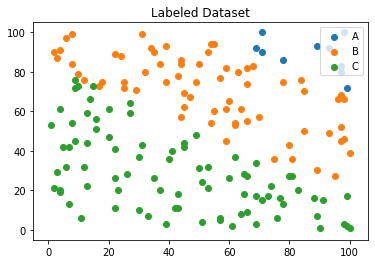

In [9]:
# Plot labeled dataset
plot_dataset(labeled_dataset)

In [10]:
# Input dataset
input_dataset = full_dataset[int(total_row*slicing):][["assignment", "exam"]]
input_dataset

,assignment,exam
160,52,2
161,84,30
162,40,33
163,76,66
164,54,59
...,...,...
395,67,28
396,65,85
397,12,61
398,20,3


In [11]:
# Determine Real Output Class
def grade(assignment, exam):
    result = (0.4 * assignment) + (0.6 * exam)
    if (result >= 80):
        return 'A'
    elif (result >= 50):
        return 'B'
    else:
        return 'C'

In [12]:
# Do KNN
max_k = 10
result_accuracy = knn(labeled_dataset, input_dataset, max_k)

Procced Data: 24
Procced Data: 48
Procced Data: 72
Procced Data: 96
Procced Data: 120
Procced Data: 144
Procced Data: 168
Procced Data: 192
Procced Data: 216
Procced Data: 240
Done!


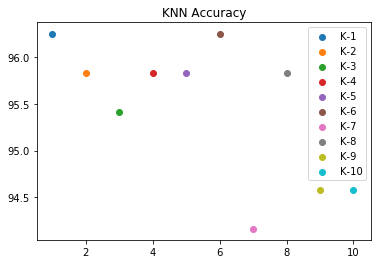

In [15]:
# Plot Accuracy
plot_accuracy(result_accuracy)